# 2. Data Analysis & Preprocessing

This JupyterNotebook is part of an exercise series titled *Data Analysis & Preprocessing*. The series itself includes practical exercises for lectures *3. Getting to Know Your Data* and *4. Data Preprocessing*. 

Exercises for data analysis and preprocessing is divided into three parts in total, namely:

- Part One: Getting to Know Your Data
- Part Two: Preprocessing - Data Cleaning & Data Integration
- Part Three: Preprocessing - Data Reduction, Data Transformation & Data Discretization

Recall that we have two exercise groups. Depending on how each group progresses, some parts of these exercises may not be discussed in its entirety. If questions arise, ask them in your study group or in our StudOn forum.

## Part Two: Preprocessing - Data Cleaning & Data Integration

In this part you will apply the theoretical knowledge gained in the first part of the lecture *4. Data Preprocessing*. 

### Preparations

In [1]:
# Import the required libraries
import tempfile
import sqlite3
import os
import urllib.request
import scipy.stats
import pandas as pd

In [2]:
# Create a temporary directory
dataset_folder = tempfile.mkdtemp()

# Build path to database
database_path = os.path.join(dataset_folder, "adventure-works.db")

# Get the database
urllib.request.urlretrieve(
    "https://github.com/FAU-CS6/KDD-Databases/raw/main/AdventureWorks/adventure-works.db",
    database_path,
)

# Open connection to the adventure-works.db
connection = sqlite3.connect(database_path)

In [3]:
# Modify the database to contain dirty data
cursor = connection.cursor()
cursor.executescript(
    "UPDATE Person SET LastName = 'Doe';"
    "UPDATE Employee SET HireDate = STRFTIME('%Y-%m-%d %H:%M:%S', HireDate);"
    "UPDATE Employee SET BirthDate = STRFTIME('%Y-%m-%d %H:%M:%S', BirthDate);"
    "UPDATE Employee SET Gender = 'Male' WHERE Gender = 'M' AND NationalIDNumber LIKE \"%8\";"
    "UPDATE Employee SET Gender = 'Female' WHERE Gender = 'F' AND NationalIDNumber LIKE \"%7%\";"
    "UPDATE Employee SET BirthDate = STRFTIME('%Y-%m-%d', BirthDate) WHERE NationalIDNumber LIKE \"%2%\";"
    "UPDATE Employee SET SickLeaveHours = 2306 WHERE BusinessEntityID = 10;"
    "UPDATE Employee SET VacationHours = -12 WHERE BusinessEntityID = 21;"
    "UPDATE Person SET LastName = 'Doe';"
    "UPDATE Employee SET JobTitle = 'None' WHERE NationalIDNumber LIKE \"%1\";"
    "UPDATE Employee SET CurrentFlag = 0 WHERE NationalIDNumber = 658797903 OR NationalIDNumber = 974026903;"
    "UPDATE Employee SET HireDate = STRFTIME('%Y-%m-%d %H:%M:%S', DATE(BirthDate, '-10 year')) "
    'WHERE NationalIDNumber LIKE "2%";'
)

In [4]:
# Create the dirty DataFrame(s)
# Employee DataFrame
dirty_employee_df = pd.read_sql_query(
    "SELECT NationalIDNumber, LoginID, OrganizationNode, JobTitle, BirthDate, MaritalStatus, Gender,"
    "HireDate, SalariedFlag, VacationHours, SickLeaveHours, CurrentFlag, PersonType, NameStyle, Title,"
    "FirstName, MiddleName, LastName, Suffix, EmailPromotion, AdditionalContactInfo, Demographics "
    "FROM Employee "
    "JOIN Person ON Employee.BusinessEntityID = Person.BusinessEntityID",
    connection,
    index_col="NationalIDNumber",
)

### Recognizing dirty data

Recall that we did not look for dirty data in the `order_df`. Real world data rarely contains data without some 
inconsistencies or noise. For this reason, we will now look at the `dirty_employee_df` that contains obvious 
inconsistencies.

<div class="alert alert-block alert-info">

**Task:** Independently use the skills you learned in Part One to familiarize yourself with the `dirty_employee_df`. In doing so, try to identify as many problems as possible with the dataset at hand.
</div>

In [5]:
# Use the methods you learned in Part One to familiarize yourself with dirty_employee_df
# (Create new code cells whenever necessary)

In [6]:
# Since this task is very loosely defined, no 100% sample solution can be given here.

# But a minimum is to look at the shape of the DataFrame
dirty_employee_df.shape

(290, 21)

In [7]:
# And then at least take a quick look at the head of all attributes. (Part 1)
dirty_employee_df[dirty_employee_df.columns[0:10]].head(25)

,LoginID,OrganizationNode,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours
NationalIDNumber,,,,,,,,,,
295847284,adventure-works\ken0,None,Chief Executive Officer,1969-01-29,S,M,1959-01-29 00:00:00,1,99,69
245797967,adventure-works\terri0,b'X',Vice President of Engineering,1971-08-01,S,Female,1961-08-01 00:00:00,1,1,20
509647174,adventure-works\roberto0,b'Z\xc0',Engineering Manager,1974-11-12 00:00:00,M,M,2007-11-11 00:00:00,1,2,21
112457891,adventure-works\rob0,b'Z\xd6',None,1974-12-23,S,M,2007-12-05 00:00:00,0,48,80
695256908,adventure-works\gail0,b'Z\xda',Design Engineer,1952-09-27,M,F,2008-01-06 00:00:00,1,5,22
998320692,adventure-works\jossef0,b'Z\xde',Design Engineer,1959-03-11,M,M,2008-01-24 00:00:00,1,6,23
134969118,adventure-works\dylan0,b'Z\xe1',Research and Development Manager,1987-02-24 00:00:00,M,Male,2009-02-08 00:00:00,1,61,50
811994146,adventure-works\diane1,b'Z\xe1X',Research and Development Engineer,1986-06-05 00:00:00,S,F,2008-12-29 00:00:00,1,62,51
658797903,adventure-works\gigi0,b'Z\xe1h',Research and Development Engineer,1979-01-21 00:00:00,M,Female,2009-01-16 00:00:00,1,63,51


In [8]:
# And then at least take a quick look at the head of all attributes. (Part 2)
dirty_employee_df[dirty_employee_df.columns[10:21]].head(25)

,CurrentFlag,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics
NationalIDNumber,,,,,,,,,,,
295847284,1,EM,0,None,Ken,J,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
245797967,1,EM,0,None,Terri,Lee,Doe,None,1,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
509647174,1,EM,0,None,Roberto,None,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
112457891,1,EM,0,None,Rob,None,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
695256908,1,EM,0,Ms.,Gail,A,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
998320692,1,EM,0,Mr.,Jossef,H,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
134969118,1,EM,0,None,Dylan,A,Doe,None,2,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
811994146,1,EM,0,None,Diane,L,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
658797903,0,EM,0,None,Gigi,N,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."


#### Incomplete

Incomplete data can take many different forms. If you look at the present data set, you will notice `None` values in various attributes. 

In [9]:
# Print the columns containing at least one `None`
dirty_employee_df[
    [
        "OrganizationNode",
        "JobTitle",
        "Title",
        "MiddleName",
        "Suffix",
        "AdditionalContactInfo",
    ]
].head(25)

,OrganizationNode,JobTitle,Title,MiddleName,Suffix,AdditionalContactInfo
NationalIDNumber,,,,,,
295847284,None,Chief Executive Officer,None,J,None,None
245797967,b'X',Vice President of Engineering,None,Lee,None,None
509647174,b'Z\xc0',Engineering Manager,None,None,None,None
112457891,b'Z\xd6',None,None,None,None,None
695256908,b'Z\xda',Design Engineer,Ms.,A,None,None
998320692,b'Z\xde',Design Engineer,Mr.,H,None,None
134969118,b'Z\xe1',Research and Development Manager,None,A,None,None
811994146,b'Z\xe1X',Research and Development Engineer,None,L,None,None
658797903,b'Z\xe1h',Research and Development Engineer,None,N,None,None


Not every `None` equates to missing data. Sometimes it is simply the correct information that the attribute value is "nothing". This can be seen in the six attributes presented. 

<div class="alert alert-block alert-info">

**Task:** For each of the attributes at hand, consider whether the `None` values indicate incomplete information, or if `None` is justified.
</div>

Write down your solution here:

A 100% assessment of which attributes are correct and which are not usually requires a knowledge of a domain expert. Without an domain expert we can only make educated assumptions like the following:

<u>Most likely correct attributes:</u>

- <b>MiddleName:</b> Some `None` values in the MiddleName are quite normal as not every person might have a middle name. However, it is still possible that this value is missing.
- <b>Suffix:</b> Even if the first 25 tuples contain only `None` values, this column also contains values like `III` and `Jr.` Since also in the normal case not many people carry such a suffix in the name, it seems quite valid that there are also many `Null` values here.
- <b>AdditionalContactInfo:</b> Again, the `None` values definitely suggest that this is a valid value. It also sounds reasonable that "Additional" information does not always have to be given.

<u>Most likely incomplete attributes:</u>

- <b>JobTitle:</b> It seems strange that in a dataset of employees, some people do not have a JobTitle. This is most likely incomplete information.
- <b>Title:</b> If the non-`None` values in Title were academic titles such as "Dr." or "Prof." it would be expected that these titles do not actually exist for every employee. However, since titles such as "Mr." or "Ms." are also used, it can be assumed that information is simply missing. It should definitely be possible to specify these titles for each employee.

<u>Attributes difficult to assess:</u>

- <b>OrganizationNode:</b> There is also a `None` value in the OrganizationNode attribute. However, this is assigned to the CEO of all people (see JobTitle). It is quite possible that only employees with superiors should be assigned to an OrganizationNode. However, this could also be an error as the CEO may have been with the company the longest and may simply have forgotten to add his OrganizationNode.

#### Noisy

Noisy data, i.e. small measurement inaccuracies, are difficult to detect in the context of such an exercise. However, it is almost certain that the present data set does not contain any noisy data. 

<div class="alert alert-block alert-info">

**Task:** Consider why noisy data is unlikely to be included in `dirty_employee_df`.
</div>

Write down your solution here:

The `dirty_employee_df` does not contain measured data. It is therefore extremely unlikely that noise is included in the data.

#### Inconsistencies

Examples of inconsistencies of this data set can be found in the attributes `Gender`, `BirthDate`, and `HireDate`. 

<div class="alert alert-block alert-info">

**Task:** Print the head of the attributes `Gender`, `BirthDate`, and `HireDate`.
</div>

In [10]:
# Print the head of "Gender", "BirthDate", and "HireDate"

In [11]:
# Print the head of "Gender", "BirthDate", and "HireDate"
dirty_employee_df[["Gender", "BirthDate", "HireDate"]].head(25)

,Gender,BirthDate,HireDate
NationalIDNumber,,,
295847284,M,1969-01-29,1959-01-29 00:00:00
245797967,Female,1971-08-01,1961-08-01 00:00:00
509647174,M,1974-11-12 00:00:00,2007-11-11 00:00:00
112457891,M,1974-12-23,2007-12-05 00:00:00
695256908,F,1952-09-27,2008-01-06 00:00:00
998320692,M,1959-03-11,2008-01-24 00:00:00
134969118,Male,1987-02-24 00:00:00,2009-02-08 00:00:00
811994146,F,1986-06-05 00:00:00,2008-12-29 00:00:00
658797903,Female,1979-01-21 00:00:00,2009-01-16 00:00:00


<div class="alert alert-block alert-info">

**Task:** Consider what inconsistencies are in the `Gender` attribute.
</div>

Write down your solution here:

The Gender in the data set is partly given as `F` and `M` and partly as `Female` and `Male`.

<div class="alert alert-block alert-info">

**Task:** Consider what inconsistencies are in the `BirthDate` attribute.</div>

Write down your solution here:

The format in which the `BirthDate` has been specified differs.

<div class="alert alert-block alert-info">

**Task:** Consider what inconsistencies are in the `HireDate` attribute. (Hint: Consider the attribute in conjunction with the other two attributes)</div>

Write down your solution here:

The `HireDate` is partly before the birthday. This is first of all an inconsistency, but the probability is high that this is actually even an error.

#### Errors/Outlier

Errors in numerical values and in the special outlier are sometimes not quite detectable at a glance. Fortunately, we have already learned methods in Part One that we can now use.

Let's first consider the `SickLeaveHours` attribute. First, let's look at the `SickLeaveHours` attribute. Does it contain outliers or errors?

<div class="alert alert-block alert-info">

**Task:** Use a boxplot diagram to graphically analyze whether `SickLeaveHours` contains Outliers.
</div>

In [12]:
# Draw a boxplot diagram for "SickLeaveHours"

<AxesSubplot:>

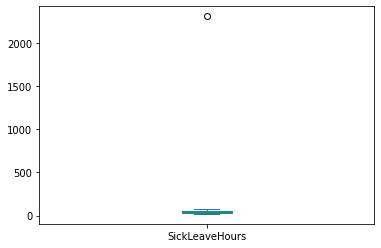

In [13]:
# Draw a boxplot diagram for "SickLeaveHours"
dirty_employee_df["SickLeaveHours"].plot.box()

<div class="alert alert-block alert-info">

**Task:** Think about a way to find out which tuple contains the outlier in `SickLeaveHours`.
</div>

In [14]:
# Output the tuple containing the outlier

In [15]:
# It is clear from the boxplot diagram that the SickLeaveHours of the Outlier are above 2000. This can be used:
dirty_employee_df[dirty_employee_df["SickLeaveHours"] > 2000]

,LoginID,OrganizationNode,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,...,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics
NationalIDNumber,,,,,,,,,,,,,,,,,,,,,
879342154,adventure-works\michael6,b'Z\xe1x',Research and Development Manager,1984-11-30,M,M,2009-05-03 00:00:00,1,16,2306,...,EM,0,None,Michael,None,Doe,None,2,None,"<IndividualSurvey xmlns=""http://schemas.micros..."


Additionally, let's take a look at `VacationHours`.

<div class="alert alert-block alert-info">

**Task:** Use a boxplot diagram to graphically analyze whether `VacationHours` contains Outliers.
</div>

In [16]:
# Draw a boxplot diagram for "VacationHours"

<AxesSubplot:>

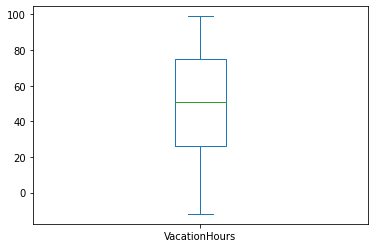

In [17]:
# Draw a boxplot diagram for "VacationHours"
dirty_employee_df["VacationHours"].plot.box()

<div class="alert alert-block alert-info">

**Task:** Even though the boxplot diagram does not show any outliers, it clearly indicates a possible error in `VacationHours`. Which error?
</div>

Write down your solution here:

The minimum whisker extends to below 0 . It seems strange that hours can also become negative.

<div class="alert alert-block alert-info">

**Task:** Output the affected tuples.
</div>

In [18]:
# Output the tuple(s) containing the error

In [19]:
# Output the tuple(s) containing the error
dirty_employee_df[dirty_employee_df["VacationHours"] < 0]

,LoginID,OrganizationNode,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,...,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics
NationalIDNumber,,,,,,,,,,,,,,,,,,,,,
243322160,adventure-works\terry0,b'l`',Marketing Specialist,1986-02-04,M,M,1976-02-04 00:00:00,0,-12,42,...,EM,0,None,Terry,J,Doe,None,2,None,"<IndividualSurvey xmlns=""http://schemas.micros..."


#### Intentional

There is also an intentional error in the `dirty_employee_df`. It can be found in either the `MaritalStatus`, `SalariedFlag`, `FirstName`, or `LastName` attribute.

<div class="alert alert-block alert-info">

**Task:** Again, independently use your learned skills to search the attributes `MaritalStatus`, `SalariedFlag`, `FirstName`, and `LastName` for the intentional error.
</div>

In [20]:
# Search for the intentional error

In [21]:
# Search for the intentional error
dirty_employee_df[["MaritalStatus", "SalariedFlag", "FirstName", "LastName"]].head(25)

,MaritalStatus,SalariedFlag,FirstName,LastName
NationalIDNumber,,,,
295847284,S,1,Ken,Doe
245797967,S,1,Terri,Doe
509647174,M,1,Roberto,Doe
112457891,S,0,Rob,Doe
695256908,M,1,Gail,Doe
998320692,M,1,Jossef,Doe
134969118,M,1,Dylan,Doe
811994146,S,1,Diane,Doe
658797903,M,1,Gigi,Doe


<div class="alert alert-block alert-info">

**Task:** In which of the attributes is the intentional error to be found.
</div>

<b>The attribute with the intentional error:</b>
1. [ ] MaritalStatus
2. [ ] SalariedFlag
3. [ ] FirstName
4. [ ] LastName

<b>The attribute with the intentional error:</b>
1. [ ] MaritalStatus
2. [ ] SalariedFlag
3. [ ] FirstName
4. [X] LastName

<div class="alert alert-block alert-info">

**Task:** Why do you think is this error intentional?
</div>

Write down your solution here:

For data protection reasons, it may sometimes be necessary to anonymize data. While it is rather atypical that this is the case with an employee database, if the data set had been issued for external analysis, for example, and it contained salary data, then one could explain such anonymization. However, it would be quite advantageous if not only this one attribute had been anonymized then.

### Data Cleaning

The mere detection of dirty data is, of course, only the first step in the data cleaning process. While it is a best case scenario to correct dirty data step by step once it has been identified, this is often a lengthy and difficult process. 

In our example from section [Incomplete](#Incomplete), for example, only inconsistencies in `Gender` and `BirthDate` can be quickly fixed.

<div class="alert alert-block alert-info">

**Task:** Replace all occurrences of `Female` with `F` and all occurrences of `Male` with `M` in the `Gender` attribute of the `dirty_employee_df`. (Help: [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html))
</div>

In [22]:
# Replace "Female" and "Male" values in "Gender"

In [23]:
# Replace "Female" and "Male" values in "Gender"
dirty_employee_df.replace({"Gender": {"Female": "F", "Male": "M"}}, inplace=True)

<div class="alert alert-block alert-info">

**Task:** Delete the suffix `00:00:00` in the `BirthDate` attribute. (Help: [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) - Hint: You may want to use a regular expression.)
</div>

In [24]:
# Delete the suffix 00:00:00 in BirthDate

,LoginID,OrganizationNode,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,...,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics
NationalIDNumber,,,,,,,,,,,,,,,,,,,,,
295847284,adventure-works\ken0,None,Chief Executive Officer,1969-01-29,S,M,1959-01-29 00:00:00,1,99,69,...,EM,0,None,Ken,J,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
245797967,adventure-works\terri0,b'X',Vice President of Engineering,1971-08-01,S,F,1961-08-01 00:00:00,1,1,20,...,EM,0,None,Terri,Lee,Doe,None,1,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
509647174,adventure-works\roberto0,b'Z\xc0',Engineering Manager,1974-11-12 00:00:00,M,M,2007-11-11 00:00:00,1,2,21,...,EM,0,None,Roberto,None,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
112457891,adventure-works\rob0,b'Z\xd6',None,1974-12-23,S,M,2007-12-05 00:00:00,0,48,80,...,EM,0,None,Rob,None,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
695256908,adventure-works\gail0,b'Z\xda',Design Engineer,1952-09-27,M,F,2008-01-06 00:00:00,1,5,22,...,EM,0,Ms.,Gail,A,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758596752,adventure-works\lynn0,b'\x95\xab',Sales Representative,1977-02-14,S,F,2013-05-30 00:00:00,1,36,38,...,SP,0,None,Lynn,N,Doe,None,2,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
982310417,adventure-works\amy0,b'\x95\xe0',European Sales Manager,1957-09-20,M,F,2012-04-16 00:00:00,1,21,30,...,SP,0,None,Amy,E,Doe,None,1,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
954276278,adventure-works\rachel0,b'\x95\xeb',Sales Representative,1975-07-09,S,F,2013-05-30 00:00:00,1,35,37,...,SP,0,None,Rachel,B,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."


In [ ]:
# Delete the suffix 00:00:00 in BirthDate
dirty_employee_df.replace(
    {"BirthDate": r"\ 00:00:00"}, {"BirthDate": ""}, regex=True, inplace=True
)

If only individual tuples contain an error/outlier and these cannot be manually fixed, the most efficient approach is often to simply remove these tuples from the dataset. 

For example this would apply to the tuples with `NationalIDNumber` 243322160 and 879342154 in the `dirty_employee_df`.

<div class="alert alert-block alert-info">

**Task:** Delete the tuples with `NationalIDNumber` 243322160 and 879342154. (Help: [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html))
</div>

In [ ]:
# Delete the tuples with NationalIDNumber 243322160 and 879342154

In [ ]:
# Delete the tuples with NationalIDNumber 243322160 and 879342154
dirty_employee_df.drop("243322160", inplace=True)
dirty_employee_df.drop("879342154", inplace=True)

Even for attributes that do not contain any information, it usually makes more sense to remove them from the data set. 

In this example this is the case with the attribute `LastName`.

<div class="alert alert-block alert-info">

**Task:** Delete the attribute `LastName`. (Help: [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html))
</div>

In [ ]:
# Delete the attribute LastName

In [ ]:
# Delete the attribute LastName
dirty_employee_df.drop(columns=["LastName"], inplace=True)

### Data integration

In the context of data integration, we mainly looked at correlation in the lecture. Calculation of this depends on the type of data.

#### Nominal data

One of the two data types we looked at in more detail in the lecture is nominal data. This describes all data that that is used to label variables without providing any quantitative value.

The first combination of nominal attributes we will look at in this section are `Gender` and `CurrentFlag`. We start by displaying the contigency table for these attributes.

<div class="alert alert-block alert-info">

**Task:** Use the pandas function `crosstab()` to create a contingency table for the attributes `Gender` and `CurrentFlag`. Show the subtotals one time and once not. (Help: [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html))
</div>

In [ ]:
# Display a contingency table without subtotals

In [ ]:
# Display a contingency table with subtotals

In [ ]:
# Display a contingency table without subtotals
pd.crosstab(dirty_employee_df["Gender"], dirty_employee_df["CurrentFlag"])

In [ ]:
# Display a contingency table with subtotals
pd.crosstab(
    dirty_employee_df["Gender"],
    dirty_employee_df["CurrentFlag"],
    margins=True,
)

The disadvantage of this contingency table is, of course, that only the observed quantities are displayed. For the calculation of the correlation, however, the expected quantities are also important. These can be calculated for example with the function `expected_freq()` from SciPy.

<div class="alert alert-block alert-info">

**Task:** Use `expected_freq()` to output the expected quantities for the attributes `Gender` and `CurrentFlag`. (Help: [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.expected_freq.html#scipy.stats.contingency.expected_freq))
</div>

In [ ]:
# Display the expected quantities

In [ ]:
# Display the expected quantities
# Sample solution 1: Use pd.crosstab
pd_crosstab = pd.crosstab(dirty_employee_df["Gender"], dirty_employee_df["CurrentFlag"])

# Compute the expected_frequencies
# (it is fine if you just output them - the creation of a pd.DataFrame is just a bonus)
pd_expected_frequencies = scipy.stats.contingency.expected_freq(pd_crosstab)

# Create a pd.DataFrame
pd.DataFrame(
    data=pd_expected_frequencies, index=pd_crosstab.index, columns=pd_crosstab.columns
)

In [ ]:
# Sample solution 2: Use scipy.stats.contingency.crosstab
sp_crosstab_elements, sp_crosstab_count = scipy.stats.contingency.crosstab(
    dirty_employee_df["Gender"], dirty_employee_df["CurrentFlag"]
)

# Compute the expected_frequencies
# (it is fine if you just output them - the creation of a pd.DataFrame is just a bonus)
sp_expected_frequencies = scipy.stats.contingency.expected_freq(sp_crosstab_count)

# Create a pd.DataFrame
pd.DataFrame(
    data=sp_expected_frequencies,
    index=sp_crosstab_elements[0],
    columns=sp_crosstab_elements[1],
)

One can see that both the expected and observed values are quite close indicating a small correlation. 

However, in the lecture, the Chi-squared test was presented as a method to validate this more accurately.

<div class="alert alert-block alert-info">

**Task:** Use the function `chi2_contingency` from SciPy to determine the correlation between `Gender` and `CurrentFlag`. (Help: [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency))
</div>

In [ ]:
# Compute chi-squared for "Gender" and "CurrentFlag"

In [ ]:
# Compute chi-squared for "Gender" and "CurrentFlag"
scipy.stats.chi2_contingency(pd_crosstab)

<div class="alert alert-block alert-info">

**Task:** Find out what the different values in the above output of `chi2_contingency` stand for and describe how to interpret them in this case.
</div>

Write down your solution here:

- <b>First value (0.0):</b><br />
This value represents the actual Chi-squared value. The closer it is to 0, the less correlation there is between attributes. Since this value is 0.0, we can assume there is no correlation between "Gender" and "CurrentFlag". (However: see explanation of the second value)

- <b>Second value (1.0):</b><br />
This is the so-called p-value. If this value is higher than the selected level of statistical significance (usually 0.01, 0.05 or 0.10), the chi-squared value is not fully reliable. Since in this case the value is significantly higher than any normally selected value, it can be assumed that our chi-squared should be viewed with great caution. 

- <b>Third value (1):</b><br />
The third value describes the degrees of freedom. This value is related to the number of categories (number of categories minus one). So there are two categories in our case (of course we already knew this from the contingency table).

- <b>Last value (Array):</b><br />
This is just another version of the expected values known from the previous task.

Second, let's look at the `Gender` and `SalariedFlag` attributes.

<div class="alert alert-block alert-info">

**Task:** Using the methods learned above, calculate Chi-squared for `Gender` and `SalariedFlag`.
</div>

In [ ]:
# Compute chi-squared for "Gender" and "SalariedFlag"

In [ ]:
# Compute chi-squared for "Gender" and "SalariedFlag"
pd_crosstab_salaried = pd.crosstab(
    dirty_employee_df["Gender"], dirty_employee_df["SalariedFlag"]
)
scipy.stats.chi2_contingency(pd_crosstab_salaried)

<div class="alert alert-block alert-info">

**Task:** Interpret the chi-squared for `Gender` and `SalariedFlag`.
</div>

Write down your solution here:

The two most important values for interpretation are the actual chi-squared value and the p-value. 

The p-value in this case is just above 0.05, so it does not yet reach this level of statistical significance. Depending on how certain one wants to be in drawing conclusions, one can either accept or reject the result of the chi-squared test.

The chi-squared value of about 3.65 is clearly above 0, so it is much more correlation than in the combination `Gender` and `CurrentFlag`.

#### Numerical data

The other data type we have considered in the context of correlation is the numeric data type. Here, it is suitable to look at the connection between `VacationHours` and `SickLeaveHours`. 

A method of graphical analysis of correlation in numerical data should already be known from Part One.

<div class="alert alert-block alert-info">

**Task:** Draw a scatter plot regarding `VacationHours` and `SickLeaveHours`.
</div>

In [ ]:
# Draw a scatter plot regarding "VacationHours" and "SickLeaveHours"

In [ ]:
# Draw a scatter plot regarding "VacationHours" and "SickLeaveHours"
dirty_employee_df.plot.scatter(x="VacationHours", y="SickLeaveHours")

However, what was not part of the method in Part One is the interpretation of this diagram.

<div class="alert alert-block alert-info">

**Task:** Interpret the scatter plot regarding `VacationHours` and `SickLeaveHours`.
</div>

Write down your solution here:

The scatter plot shows positive correlation between both variables indicating that employees who have been on more vacation are sick more often. 

**Caution in interpretation:** This may also be due to the fact that both `VacationHours` and `SickLeaveHours` were simply added over the contract period. We did not consider this in this analysis.

We can, of course, evaluate this graphical analysis mathematically. In the lecture we used Pearson's product-moment coefficient for this purpose.

<div class="alert alert-block alert-info">

**Task:** Compute pearson's product-moment coefficient for `VacationHours` and `SickLeaveHours`. Use SciPy's `pearsonr()` function. (Help: [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html))
</div>

In [ ]:
# Compute pearson's product-moment coefficient for "VacationHours" and "SickLeaveHours"

In [ ]:
# Compute pearson's product-moment coefficient for "VacationHours" and "SickLeaveHours"
scipy.stats.pearsonr(
    dirty_employee_df["VacationHours"],
    dirty_employee_df["SickLeaveHours"],
)

<div class="alert alert-block alert-info">

**Task:** Find out what the different values in the above output of `pearsonr` stand for and describe how to interpret them in this case.
</div>

Write down your solution here:

- <b>First value (approx. 0.989):</b><br />
This value represents the actual Pearson’s correlation coefficient. If it is positive, then there is a positive correlation between the two attributes. Our graphical analysis is confirmed here.

- <b>Second value (approx. 0.000):</b><br />
Similar to the chi-squared test, this is the p-value. Since this is virtually zero in this case, a high statistical significance can be assumed.